<a href="https://colab.research.google.com/github/signofcommunication/Tugas-Matana-University/blob/master/UAS_Statistika_Probabilitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import numpy as np

Statistik Deskriptif Numerik:
       Admission grade  Curricular units 1st sem (grade)  \
count      4424.000000                       4424.000000   
mean        126.978119                         10.640822   
std          14.482001                          4.843663   
min          95.000000                          0.000000   
25%         117.900000                         11.000000   
50%         126.100000                         12.285714   
75%         134.800000                         13.400000   
max         190.000000                         18.875000   

       Curricular units 2nd sem (grade)  
count                       4424.000000  
mean                          10.230206  
std                            5.210808  
min                            0.000000  
25%                           10.750000  
50%                           12.200000  
75%                           13.333333  
max                           18.571429  

Modus:
Gender: Female
Scholarship holder: No
Targe

<ipython-input-10-52b8435239eb>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette=['#4f46e5', '#10b981', '#ef4444'])


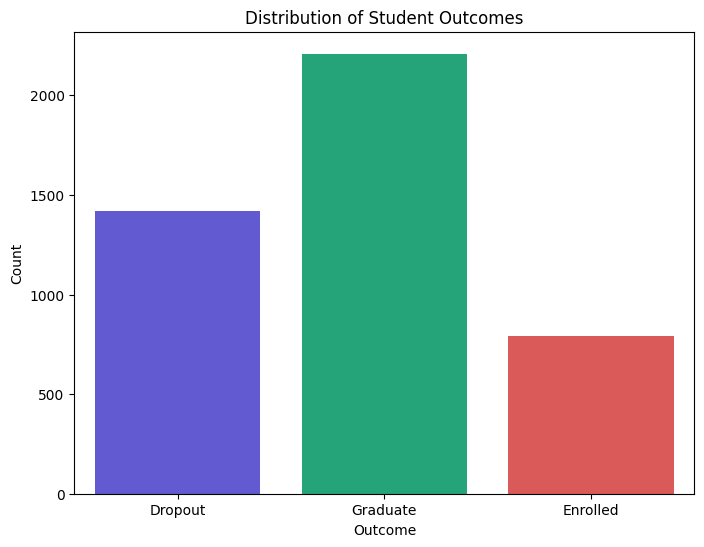

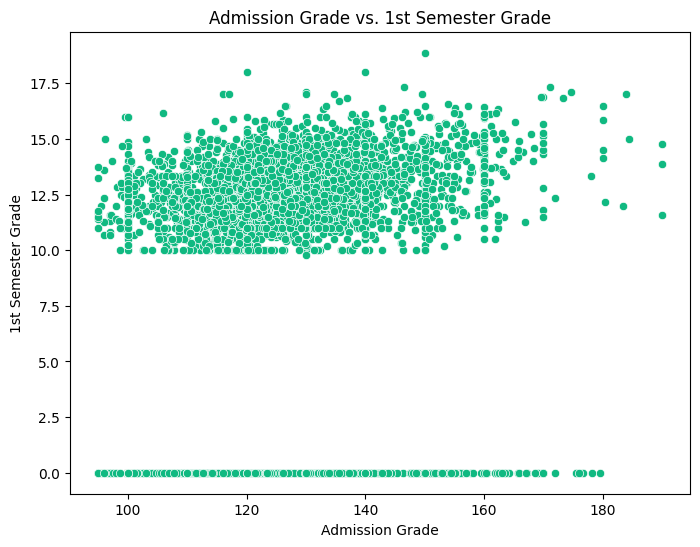

<Figure size 800x600 with 0 Axes>

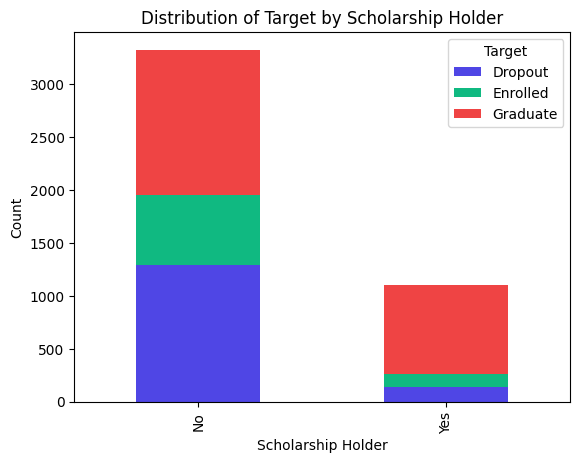

<ipython-input-10-52b8435239eb>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mentoring', y='Curricular units 1st sem (grade)', data=data, palette=['#4f46e5', '#10b981'])


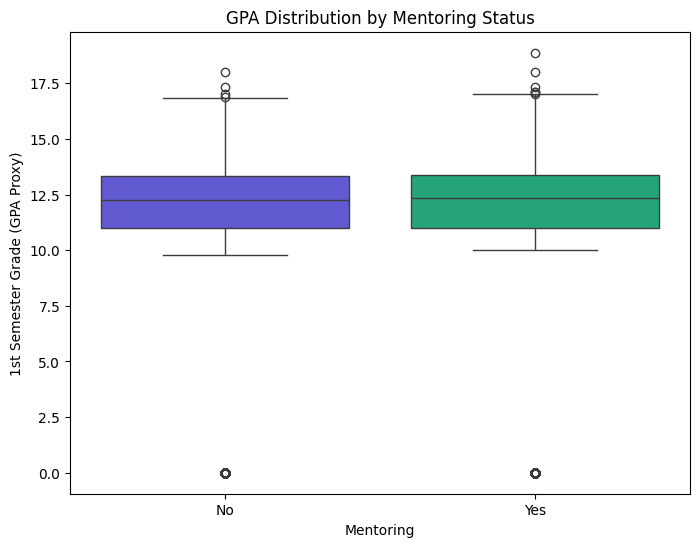

In [ ]:
# Load the dataset
data = pd.read_csv('data.csv', sep=';')

# Membersihkan data
data['Admission grade'] = pd.to_numeric(data['Admission grade'], errors='coerce').fillna(0)
data['Curricular units 1st sem (grade)'] = pd.to_numeric(data['Curricular units 1st sem (grade)'], errors='coerce').fillna(0)
data['Curricular units 2nd sem (grade)'] = pd.to_numeric(data['Curricular units 2nd sem (grade)'], errors='coerce').fillna(0)
data['Gender'] = data['Gender'].map({1: 'Male', 0: 'Female'})
data['Scholarship holder'] = data['Scholarship holder'].map({1: 'Yes', 0: 'No'})
data['Target'] = data['Target'].fillna('Unknown')  # Mengisi nilai hilang jika ada

# Simulasi kolom mentoring (contoh: 50% data menerima mentoring)
data['Mentoring'] = np.random.choice(['Yes', 'No'], size=len(data), p=[0.5, 0.5])

# Menghitung statistik deskriptif untuk variabel numerik
numeric_stats = data[['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].describe()
print("Statistik Deskriptif Numerik:")
print(numeric_stats)

# Menghitung modus untuk variabel kategorikal
mode_gender = data['Gender'].mode()[0]
mode_scholarship = data['Scholarship holder'].mode()[0]
mode_target = data['Target'].mode()[0]
print("\nModus:")
print(f"Gender: {mode_gender}")
print(f"Scholarship holder: {mode_scholarship}")
print(f"Target: {mode_target}")

# Menghitung distribusi kategori (persentase)
category_dist = data['Target'].value_counts(normalize=True) * 100
print("\nDistribusi Kategori (Target) [%]:")
print(category_dist)

# 1. Chi-Square Test (Scholarship holder vs Target)
contingency_table = pd.crosstab(data['Scholarship holder'], data['Target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Value: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# 2. P-Value Analysis (t-test untuk Admission grade berdasarkan Target)
graduate_grade = data[data['Target'] == 'Graduate']['Admission grade'].dropna()
dropout_grade = data[data['Target'] == 'Dropout']['Admission grade'].dropna()
t_stat, p_val = ttest_ind(graduate_grade, dropout_grade, nan_policy='omit')
print("\nP-Value Analysis (t-test: Graduate vs Dropout Admission Grade):")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

# 3. A/B Testing (t-test berdasarkan Mentoring dan GPA)
mentoring_yes = data[data['Mentoring'] == 'Yes']['Curricular units 1st sem (grade)'].dropna()
mentoring_no = data[data['Mentoring'] == 'No']['Curricular units 1st sem (grade)'].dropna()
t_stat_ab, p_val_ab = ttest_ind(mentoring_yes, mentoring_no, nan_policy='omit')
print("\nA/B Testing (t-test) Results:")
print(f"T-Statistic: {t_stat_ab:.4f}")
print(f"P-Value: {p_val_ab:.4f}")

# Visualisasi: Bar Chart untuk Distribusi Target
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data, palette=['#4f46e5', '#10b981', '#ef4444'])
plt.title('Distribution of Student Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Visualisasi: Scatter Plot untuk Admission Grade vs 1st Sem Grade
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Admission grade', y='Curricular units 1st sem (grade)', data=data, color='#10b981')
plt.title('Admission Grade vs. 1st Semester Grade')
plt.xlabel('Admission Grade')
plt.ylabel('1st Semester Grade')
plt.show()

# Visualisasi: Stacked Bar Chart untuk Scholarship Holder vs Target
plt.figure(figsize=(8, 6))
pd.crosstab(data['Scholarship holder'], data['Target']).plot(kind='bar', stacked=True, color=['#4f46e5', '#10b981', '#ef4444'])
plt.title('Distribution of Target by Scholarship Holder')
plt.xlabel('Scholarship Holder')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

# Visualisasi: Box Plot untuk GPA by Mentoring Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Mentoring', y='Curricular units 1st sem (grade)', data=data, palette=['#4f46e5', '#10b981'])
plt.title('GPA Distribution by Mentoring Status')
plt.xlabel('Mentoring')
plt.ylabel('1st Semester Grade (GPA Proxy)')
plt.show()